In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [150]:
df = pd.read_csv("churn.csv") 

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Pree Processing

In [151]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [152]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


EDA

C:\Users\aldri\AppData\Local\Temp\ipykernel_19164\1496200109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='coolwarm')


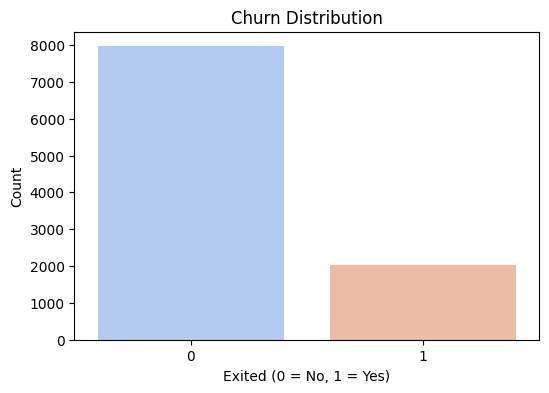

In [153]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


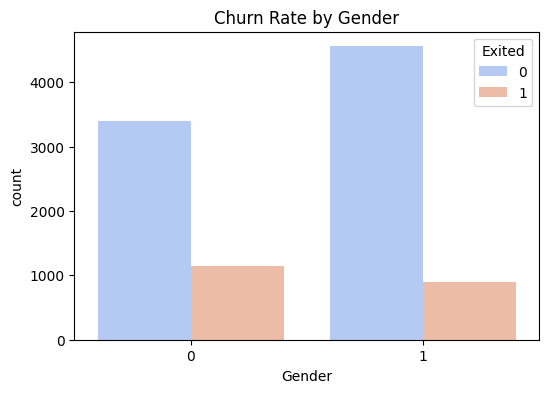

In [154]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Exited', data=df, palette='coolwarm')
plt.title("Churn Rate by Gender")
plt.show()


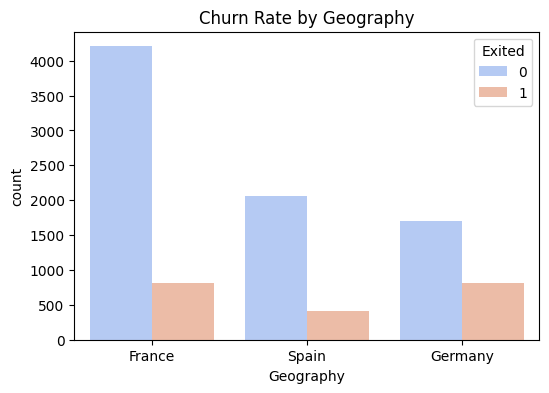

In [155]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', hue='Exited', data=df, palette='coolwarm')
plt.title("Churn Rate by Geography")
plt.show()


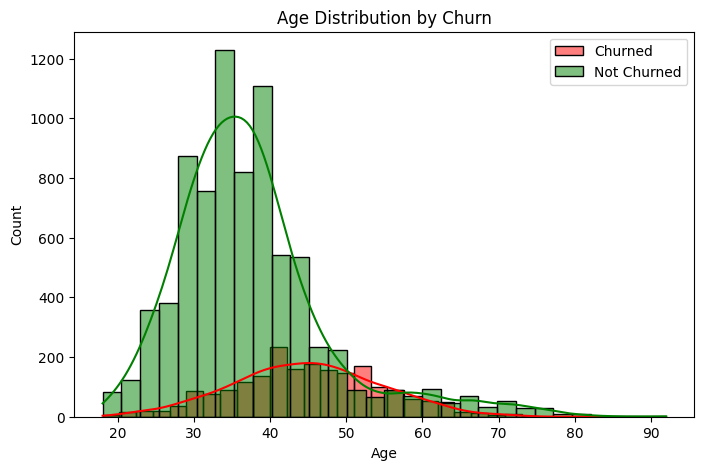

In [156]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Exited'] == 1]['Age'], bins=30, kde=True, color='red', label="Churned")
sns.histplot(df[df['Exited'] == 0]['Age'], bins=30, kde=True, color='green', label="Not Churned")
plt.title("Age Distribution by Churn")
plt.legend()
plt.show()


In [157]:
scaler = StandardScaler()  
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326221,France,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,Spain,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,France,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,France,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,Spain,0,0.388871,2,0.785728,1,1,1,-0.365276,0


In [158]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [159]:
df_numeric = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

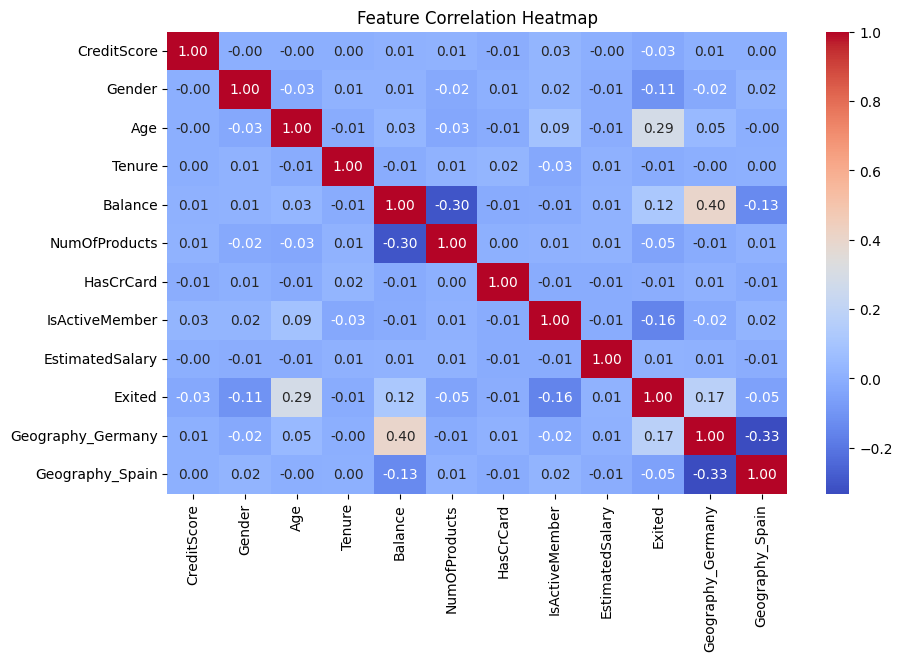

In [160]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Train Split

In [161]:
from sklearn.model_selection import train_test_split

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True, errors='ignore')

X = df.drop(columns=['Exited'])  
y = df['Exited']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (8000, 11), Testing set: (2000, 11)


Basic classifiction models

1.logistic regression

In [162]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  
y_pred_log_reg = log_reg.predict(X_test)  


accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



2.Decission tree

In [163]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  
y_pred_dt = dt.predict(X_test)  

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_dt)

print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.50      0.49       407

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [165]:

param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5, 10],  
    'max_features': ['sqrt', 'log2', None]  
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid, 
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=2  
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

y_pred_best_dt = best_dt.predict(X_test)

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)

print("\nBest Decision Tree Performance:")
print(classification_report(y_test, y_pred_best_dt))
print(f"Accuracy: {accuracy_best_dt:.4f}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.8570


3.Support Vector Classifier

In [166]:

svc_model = SVC(probability=True) 
svc_model.fit(X_train, y_train)

y_pred_svm = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svm)
precision_svc = precision_score(y_test, y_pred_svm)
recall_svc = recall_score(y_test, y_pred_svm)
f1_svc = f1_score(y_test, y_pred_svm)
auc_svc = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1])  

print("\nSupport Vector Classifier (SVM) Performance:")
print(classification_report(y_test, y_pred_svm))



Support Vector Classifier (SVM) Performance:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1593
           1       0.90      0.14      0.24       407

    accuracy                           0.82      2000
   macro avg       0.86      0.57      0.57      2000
weighted avg       0.84      0.82      0.77      2000



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4]  # Only used for 'poly' kernel
}

# Initialize SVM model
svc_model = SVC(probability=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=svc_model, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train SVM with best parameters
best_svc = SVC(**best_params, probability=True)
best_svc.fit(X_train, y_train)

# Make predictions
y_pred_best_svc = best_svc.predict(X_test)

# Evaluate model
auc_best_svc = roc_auc_score(y_test, best_svc.predict_proba(X_test)[:, 1])

print("\nBest Support Vector Classifier (SVM) Performance:")
print(classification_report(y_test, y_pred_best_svc))
print(f"AUC Score: {auc_best_svc:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nKNN Classification Performance:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_knn:.4f}")


KNN Classification Performance:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1593
           1       0.60      0.36      0.45       407

    accuracy                           0.82      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000

Accuracy: 0.8205


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Odd values to avoid ties
    'weights': ['uniform', 'distance'],  # Uniform: all neighbors equal, Distance: closer neighbors more influence
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Different distance metrics
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=knn, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train KNN with best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Make predictions
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)

print("\nBest KNN Classification Performance:")
print(classification_report(y_test, y_pred_best_knn))
print(f"Best Accuracy: {accuracy_best_knn:.4f}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

Best KNN Classification Performance:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1593
           1       0.78      0.29      0.42       407

    accuracy                           0.84      2000
   macro avg       0.81      0.63      0.66      2000
weighted avg       0.83      0.84      0.81      2000

Best Accuracy: 0.8385


In [167]:
print("COMPARSION")
print(f"Accuracy Logistic Regression: {accuracy_log_reg:.4f}")
print(f"Accuracy Decision Tree : {accuracy_best_dt:.4f}")
print(f"Support Vector Machine: {accuracy_svc:.4f}")
print(f"Accuracy K-Nearest neighbout: {accuracy_best_knn:.4f}")

COMPARSION
Accuracy Logistic Regression: 0.8080
Accuracy Decision Tree : 0.8570
Support Vector Machine: 0.8220
Accuracy K-Nearest neighbout: 0.8385


Ensembel Learning models

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  
y_pred_rf = rf.predict(X_test)  

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)  
y_pred_gb = gb.predict(X_test)  

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:

xgb = XGBClassifier()
xgb.fit(X_train, y_train)  
y_pred_xgb = xgb.predict(X_test)  

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Performance:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [169]:
print("COMPARSION")
print(f"Random Forest: {accuracy_rf:.4f}")
print(f"Gradient Boosting : {accuracy_gb:.4f}")
print(f"XGBoost: {accuracy_xgb:.4f}")

COMPARSION
Random Forest: 0.8660
Gradient Boosting : 0.8700
XGBoost: 0.8530
